# Chapter 3 - Classification

Notebook ini mereproduksi kode dan teori dari Chapter 3 dalam buku *Hands-On Machine Learning* oleh Aurélien Géron.

## 🎯 Tujuan
- Memahami klasifikasi biner dan multi-kelas.
- Menggunakan dataset MNIST.
- Menerapkan model SGDClassifier untuk klasifikasi angka.
- Evaluasi model menggunakan Cross-Validation dan Confusion Matrix.

---

## 1. Dataset MNIST

MNIST adalah dataset berisi 70.000 gambar angka tulisan tangan (0–9) dalam format grayscale 28x28 piksel. Dataset ini sering digunakan sebagai benchmark untuk tugas klasifikasi.


In [1]:
# Ambil dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
print("Shape data:", X.shape, y.shape)


Shape data: (70000, 784) (70000,)


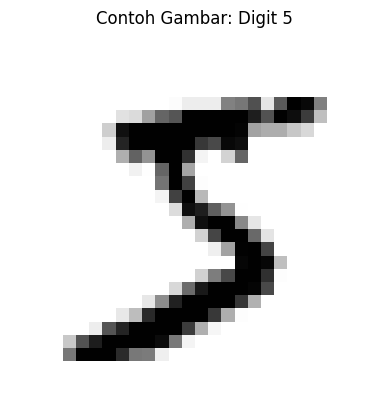

In [2]:
# Visualisasikan gambar pertama
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.title("Contoh Gambar: Digit {}".format(y[0]))
plt.show()


In [3]:
# Konversi label dari string ke integer
import numpy as np
y = y.astype(np.uint8)


## 2. Binary Classification: Mendeteksi Angka 5

Kita akan melatih model klasifikasi biner yang memprediksi apakah gambar merupakan angka 5 atau bukan.


In [6]:
# Bagi data ke train dan test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Label biner: True jika 5, False jika bukan
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [7]:
# Latih model SGDClassifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [8]:
# Uji prediksi pada satu digit
sgd_clf.predict([some_digit])  # True jika model yakin ini angka 5


array([ True])

## 3. Evaluasi Model: Cross-Validation & Confusion Matrix

Evaluasi model tidak cukup hanya melihat akurasi. Kita akan menggunakan:
- **Cross-validation**
- **Confusion Matrix**
- **Precision & Recall**
- **F1 Score**


In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print("Akurasi Cross-Validation:", scores)


Akurasi Cross-Validation: [0.95035 0.96035 0.9604 ]


In [10]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [11]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train_5, y_train_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[53892   687]
 [ 1891  3530]]


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8370879772350012
Recall: 0.6511713705958311
F1 Score: 0.7325171197343847


## 🔍 Kesimpulan

- Model SGDClassifier mampu melakukan klasifikasi biner angka 5 dengan cukup baik.
- Namun, karena dataset MNIST tidak seimbang (banyak bukan angka 5), akurasi bukan satu-satunya metrik.
- Gunakan metrik lain seperti Precision, Recall, dan F1 untuk penilaian yang lebih akurat.
- Langkah selanjutnya adalah menggunakan **Decision Threshold**, **Precision-Recall Tradeoff**, dan **ROC Curve** untuk memperdalam evaluasi model klasifikasi.

